In [1]:
%matplotlib inline
from pylab import *
rcParams['font.size'] = 15
rcParams['legend.fontsize'] = 12

# Set up paths
inputs = eval(open("../inputs.txt").read())
sys.path.insert(0, inputs['CRANE_dir']+'/02_Inference')

In [2]:
# Import Auger_Data for plotting
import Auger_Data

# import an initialize the UHE_fluence class
from Fluence import UHE_fluence
print 'Loading Lookup Table'
f = np.load(inputs['Lookup_Table'])
input_Z = f['input_Z']
input_A = f['input_A']
input_log10_E = f['input_log10_E']
input_log10_z = f['input_log10_z']
observed_log10_E = f['observed_log10_E']
observed_A = f['observed_A']
uhe_LUT = f['LUT']
fcalc = UHE_fluence(input_Z, input_A, input_log10_E, input_log10_z, observed_A, observed_log10_E, uhe_LUT)

#from Xmax import Xmax_modeler
#log10_Energy_array = np.array([19.0, 19.1, 19.2, 19.3, 19.4, 19.5]) # lower energy bins
#xmm = Xmax_modeler(observed_log10_E)

# import the likelihood class and initialize the log posterior function
from Likelihood import UHE_likelihood
# likelihood could initialize its own fcalc...
logposterior = UHE_likelihood(fcalc, ['Auger', 'Auger_Xmax'])


Loading Lookup Table
Initializing UHE_fluence
Initializing UHE_likelihood
Initializing Xmax_modeler


In [3]:
# pick a set of parameters
#parms = [norm,   spectral_index, E_max, f_He,     f_N,      f_Si,     f_Fe,    source_index, z1, z2, z3]
#parms = [1.33e-62, -2.2,         20.0,  1.11e-04, 0.5,  1.08e-04, 9.92e-02,   3.0,       1.87,2.66,3.01, 100.]
#parms = [1.33e-62, -2.2,         18.8,  0., 0.,  0., 1.0,   -3.0,       1.87,2.66,3.01, 100.]

parms = [+3.68e-61, -2.23e+00, +1.63e+01, +8.73e-03, +6.79e-01, +5.53e-02, +1.33e-17, -6.38e+01, +5.01e-02, +9.28e+00, +9.82e+00]

parms = [1.29393250e-62,  -1.99817548e-01,   1.93006095e+01,
         2.84592480e-04,   1.51246521e-05,   3.69335014e-05,
         1.00969675e-01,   1.04730244e+00,   2.31357328e+00,
         3.13768569e+00,   3.82350486e+00,   5.54552712e-01]

parms = [1.22564918e-62,  -2.06588696e-01,   1.93099320e+01,
         4.83379935e-09,   2.85451193e-05,   4.26660354e-05,
         1.09998948e-01,   1.41937712e+00,   2.15570380e+00,
         2.15570926e+00,   2.28003924e+00,   9.98734807e-01]

parms = [4.56015813e-63,  -2.27131082e-01,   1.95832387e+01,
         7.00678365e-14,   7.53912731e-06,   1.07659409e-05,
         8.81069985e-02,   9.15365728e+00,   5.47157993e+00,
         9.96299289e+00,   9.96299913e+00,   9.99982372e-01]

prms = [  5.96968635e-63,  -2.41967691e-01,   1.96869885e+01,
         1.75197491e-13,   1.06710530e-09,   1.22463042e-05,
         6.32592231e-02,   1.10692730e+01,   6.30960446e-01,
         9.63995578e+00,   9.99141997e+00,   9.99999984e-01]

fluences = fcalc.fluence_model(*parms)
nuclear_fluence = np.sum(fluences[1:], axis=0)
N_model = Auger_Data.Counts_Model(nuclear_fluence[fcalc.observed_log10_E>18.8999])

lp = logposterior(parms)
print 'Model log-posterior:', lp

Model log-posterior: -221.83841219


[  5.98260131e-18   3.92428075e-18   2.72007063e-18   1.88538351e-18
   1.28546499e-18   9.10625108e-19   5.59357973e-19   3.55001425e-19
   2.19214955e-19   1.46183952e-19   6.52574363e-20   3.04375744e-20
   1.27852715e-20   2.35298890e-21   1.25944653e-21   3.18955398e-22
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

(18.0, 22.0)

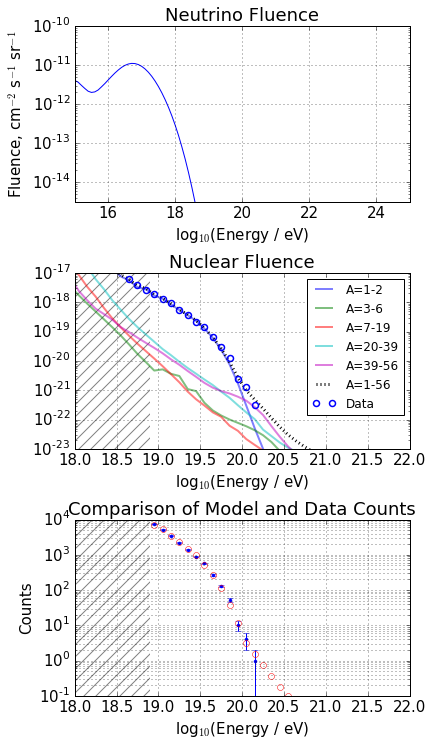

In [4]:
#print input_log10_E

figure(figsize=(6,12))
ax=subplot(311)
ax.set_yscale('log')
plot(observed_log10_E, fluences[0,:], 'b-')
ylabel('Fluence, cm$^{-2}$ s$^{-1}$ sr$^{-1}$')
xlabel('log$_{10}$(Energy / eV)')
grid(True)
title('Neutrino Fluence')
mx = np.max(fluences[0,:])
y1,y2 = ax.get_ylim()
ylim(3.e-5*y2, y2)
xlim(15., 25.)

ax2=subplot(312)
ax2.set_yscale('log')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[1:3], axis=0),   lw=2, alpha=0.5, label='A=1-2')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[3:7], axis=0),   lw=2, alpha=0.5, label='A=3-6')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[7:20], axis=0),  lw=2, alpha=0.5, label='A=7-19')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[20:40], axis=0), lw=2, alpha=0.5, label='A=20-39')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[40:], axis=0),   lw=2, alpha=0.5, label='A=39-56')
ax2.plot(observed_log10_E+0.05, nuclear_fluence, 'k:', lw=3, label='A=1-56')
data_fluence = Auger_Data.Counts.copy()
data_fluence /= np.log(10.) * Auger_Data.d_log10_E
data_fluence /= Auger_Data.Exposure
print data_fluence
ax2.plot(Auger_Data.log10_Energy_low_edges[data_fluence>0.]+0.05,  data_fluence[data_fluence>0.], 'o', mfc='none', mec='b', mew=1.5, label='Data')
mx = np.max(nuclear_fluence)
#ylim(1.e-10*mx, mx)
ylim(1.e-23,1.e-17)
#xlim(15., 25.)
xlim(18., 22.)
legend(loc=1)
y1, y2 = ax2.get_ylim()
fill_between([15., 18.9], [y1, y1], [y2,y2], facecolor='none', hatch='//', edgecolor='gray', linewidth=0.0)
title('Nuclear Fluence')
xlabel('log$_{10}$(Energy / eV)')
subplots_adjust(hspace=0.4)
grid(True)

ax3 = subplot(313)
ax3.set_yscale('log')
from scipy.stats import poisson
p_interval =  poisson.interval(0.68, Auger_Data.Counts)
cut = Auger_Data.Counts>0.
errorbar(Auger_Data.log10_Energy_low_edges[cut] + Auger_Data.d_log10_E/2., 
         Auger_Data.Counts[cut], 
         #xerr = 0.05,
         yerr=[Auger_Data.Counts[cut]-p_interval[0][cut], p_interval[1][cut]-Auger_Data.Counts[cut]], 
         fmt='.')
ylim(0.5, 1.e4)
#xticks(np.arange(18.6, 20.2, 0.1), rotation=45)
grid(True, which='both')
ylabel('Counts')
xlabel('log10 (Energy / eV)')
title('Auger Counts by Energy Bin')
plot(fcalc.observed_log10_E[fcalc.observed_log10_E>18.8999] + 0.05, N_model, 'o', mfc='none', mec='r', label='Model')
grid(True, which='both')
y1, y2 = ax3.get_ylim()
y1=0.1
fill_between([15., 18.9], [y1, y1], [y2,y2], facecolor='none', hatch='//', edgecolor='gray', linewidth=0.0)
ylim(y1,y2)
title('Comparison of Model and Data Counts')
xlabel('log$_{10}$(Energy / eV)')
xlim(18.,22.)


(56, 100)
Initializing Xmax_modeler


/home/romerowo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


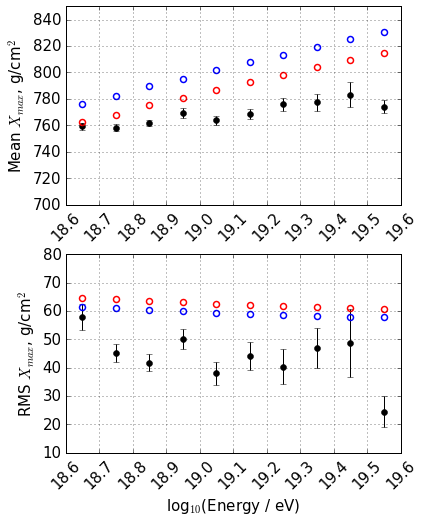

In [5]:
f_A_array = fluences[1:] / nuclear_fluence
#f_A_array = observed_log10_E
print f_A_array.shape

from Xmax import Xmax_modeler
xmm = Xmax_modeler(observed_log10_E)

model_Mean, model_RMS = xmm.getMeanRMS(f_A_array)
#model_Mean = np.mean(model_Mean, axis=0)
#model_RMS = np.mean(model_RMS, axis=0)

figure(figsize=(6,8))
subplot(211)
errorbar(Auger_Data.X_max_log10_E_low_edge + Auger_Data.d_log10_E/2.,
        Auger_Data.X_max_Mean, 
        yerr= Auger_Data.X_max_Mean_err,
        fmt = 'ko')
plot(observed_log10_E + 0.05, model_Mean[0], 'o', mfc='none', mec='r', mew=1.5)
plot(observed_log10_E + 0.05, model_Mean[1], 'o', mfc='none', mec='b', mew=1.5)
grid(True)
xticks(np.arange(18.6, 19.7, 0.1), rotation=45)
xlim(18.6, 19.6)
ylabel('Mean $X_{max}$, g/cm$^2$')
ylim(700., 850.)

subplot(212)
errorbar(Auger_Data.X_max_log10_E_low_edge + Auger_Data.d_log10_E/2.,
        Auger_Data.X_max_RMS, 
        yerr= Auger_Data.X_max_RMS_err,
        fmt = 'ko')
plot(observed_log10_E + 0.05, model_RMS[0], 'o', mfc='none', mec='r', mew=1.5)
plot(observed_log10_E + 0.05, model_RMS[1], 'o', mfc='none', mec='b', mew=1.5)
grid(True)
xticks(np.arange(18.6, 19.7, 0.1), rotation=45)
xlim(18.6, 19.6)
ylabel('RMS $X_{max}$, g/cm$^2$')
xlabel('log$_{10}$(Energy / eV)')
subplots_adjust(hspace=0.25)

In [6]:
# Example of applying minimization to improve the solution (at least locally speaking.)
# initial parameter optimization
def minus_lnprob(_parms):
    LL = logposterior(_parms)
    #'''
    print_str = '%1.2e '%LL
    for k in range(0,len(_parms)):
        print_str += '%+1.1e '%_parms[k]
    # print the values occasionally
    if(np.random.randint(0,100)==0): print print_str
    #'''
    return -1.*LL

# max calls is 2400
from scipy.optimize import minimize
max_loop = 5
success = False
loop_count = 0
while success==False and loop_count < max_loop:
    res = minimize(minus_lnprob, parms, method='nelder-mead', options={'xtol': 1e-3, 'disp': True, 'maxiter':15000})
    parms = res.x
    success = res.success
    loop_count += 1
print res
initial_parm_vals = res.x
print 'DONE MINIMIZING'


-2.18e+02 +4.4e-63 -2.3e-01 +2.0e+01 +7.0e-14 +7.5e-06 +1.1e-05 +8.8e-02 +9.6e+00 +5.4e+00 +1.0e+01 +1.0e+01 +1.0e+00 
-2.18e+02 +4.5e-63 -2.3e-01 +2.0e+01 +7.2e-14 +7.4e-06 +1.1e-05 +8.8e-02 +9.6e+00 +5.4e+00 +1.0e+01 +1.0e+01 +1.0e+00 
-2.10e+02 +5.3e-63 -2.4e-01 +2.0e+01 +1.7e-13 +2.9e-06 +7.8e-06 +9.1e-02 +1.1e+01 +6.3e-01 +9.8e+00 +1.0e+01 +9.9e-01 
-2.11e+02 +5.2e-63 -2.4e-01 +2.0e+01 +1.6e-13 +3.5e-06 +8.2e-06 +9.0e-02 +1.1e+01 +1.2e+00 +9.8e+00 +1.0e+01 +9.9e-01 
-2.10e+02 +5.3e-63 -2.4e-01 +2.0e+01 +1.7e-13 +2.9e-06 +7.8e-06 +9.1e-02 +1.1e+01 +6.3e-01 +9.8e+00 +1.0e+01 +9.9e-01 
-2.10e+02 +5.3e-63 -2.4e-01 +2.0e+01 +1.8e-13 +2.6e-06 +8.0e-06 +9.0e-02 +1.1e+01 +6.4e-01 +9.8e+00 +1.0e+01 +9.9e-01 
-inf +5.4e-63 -2.4e-01 +2.0e+01 +1.8e-13 +2.3e-06 +8.2e-06 +8.9e-02 +1.1e+01 +6.4e-01 +9.8e+00 +1.0e+01 +9.9e-01 
-inf +5.4e-63 -2.4e-01 +2.0e+01 +1.8e-13 +2.3e-06 +8.2e-06 +8.9e-02 +1.1e+01 +6.5e-01 +9.8e+00 +1.0e+01 +9.9e-01 
-2.10e+02 +5.4e-63 -2.4e-01 +2.0e+01 +1.8e-13 +2.3e-06 +8.

Maximum Likelihood Parameters
norm	5.97e-63
spectral_index	-0.24
log10_E_max	19.69
f_p	0.9367
f_He	0.0000
f_N	0.0000
f_Si	0.0000
f_Fe	0.0633
source_index	11.07
z1	0.63
z2	9.64
z3	9.99
uX	1.00
Model log-posterior: -208.579330581
[  5.98260131e-18   3.92428075e-18   2.72007063e-18   1.88538351e-18
   1.28546499e-18   9.10625108e-19   5.59357973e-19   3.55001425e-19
   2.19214955e-19   1.46183952e-19   6.52574363e-20   3.04375744e-20
   1.27852715e-20   2.35298890e-21   1.25944653e-21   3.18955398e-22
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000

(18.0, 22.0)

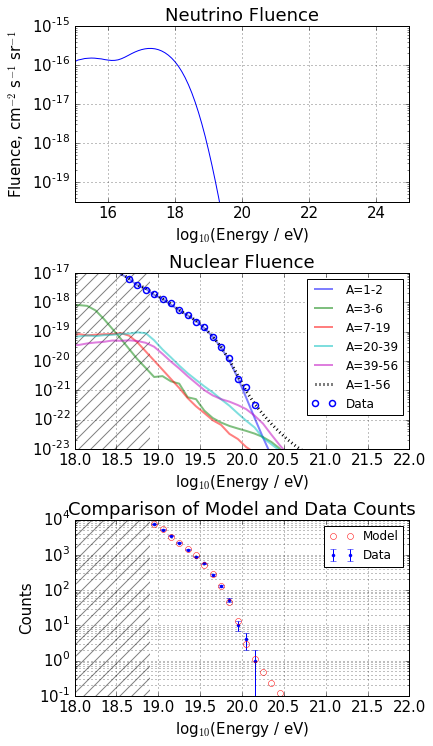

In [7]:
print 'Maximum Likelihood Parameters'
parms = res.x
print 'norm\t%1.2e'%parms[0] 
print 'spectral_index\t%1.2f'%parms[1] 
print 'log10_E_max\t%1.2f'%parms[2]
print 'f_p\t%1.4f'%(1. - np.sum(parms[3:7]))
print 'f_He\t%1.4f'%parms[3]
print 'f_N\t%1.4f'%parms[4]
print 'f_Si\t%1.4f'%parms[5]
print 'f_Fe\t%1.4f'%parms[6]
print 'source_index\t%1.2f'%parms[7]
print 'z1\t%1.2f'%parms[8]
print 'z2\t%1.2f'%parms[9]
print 'z3\t%1.2f'%parms[10]
print 'uX\t%1.2f'%parms[11]
fluences = fcalc.fluence_model(*parms)
nuclear_fluence = np.sum(fluences[1:], axis=0)
N_model = Auger_Data.Counts_Model(nuclear_fluence[fcalc.observed_log10_E>18.8999])

lp = logposterior(res.x)
print 'Model log-posterior:', lp

#print input_log10_E

figure(figsize=(6,12))
ax=subplot(311)
ax.set_yscale('log')
plot(observed_log10_E, fluences[0,:], 'b-')
ylabel('Fluence, cm$^{-2}$ s$^{-1}$ sr$^{-1}$')
xlabel('log$_{10}$(Energy / eV)')
grid(True)
title('Neutrino Fluence')
mx = np.max(fluences[0,:])
y1,y2 = ax.get_ylim()
ylim(3.e-5*y2, y2)
xlim(15., 25.)

ax2=subplot(312)
ax2.set_yscale('log')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[1:3], axis=0),   lw=2, alpha=0.5, label='A=1-2')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[3:7], axis=0),   lw=2, alpha=0.5, label='A=3-6')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[7:20], axis=0),  lw=2, alpha=0.5, label='A=7-19')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[20:40], axis=0), lw=2, alpha=0.5, label='A=20-39')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[40:], axis=0),   lw=2, alpha=0.5, label='A=39-56')
ax2.plot(observed_log10_E+0.05, nuclear_fluence, 'k:', lw=3, label='A=1-56')
data_fluence = Auger_Data.Counts.copy()
data_fluence /= np.log(10.) * Auger_Data.d_log10_E
data_fluence /= Auger_Data.Exposure
print data_fluence
ax2.plot(Auger_Data.log10_Energy_low_edges[data_fluence>0.]+0.05,  data_fluence[data_fluence>0.], 'o', mfc='none', mec='b', mew=1.5, label='Data')
mx = np.max(nuclear_fluence)
#ylim(1.e-10*mx, mx)
ylim(1.e-23,1.e-17)
#xlim(15., 25.)
xlim(18., 22.)
legend(loc=1)
y1, y2 = ax2.get_ylim()
fill_between([15., 18.9], [y1, y1], [y2,y2], facecolor='none', hatch='//', edgecolor='gray', linewidth=0.0)
title('Nuclear Fluence')
xlabel('log$_{10}$(Energy / eV)')
subplots_adjust(hspace=0.4)
grid(True)

ax3 = subplot(313)
ax3.set_yscale('log')
from scipy.stats import poisson
p_interval =  poisson.interval(0.68, Auger_Data.Counts)
cut = Auger_Data.Counts>0.
errorbar(Auger_Data.log10_Energy_low_edges[cut] + Auger_Data.d_log10_E/2., 
         Auger_Data.Counts[cut], 
         #xerr = 0.05,
         yerr=[Auger_Data.Counts[cut]-p_interval[0][cut], p_interval[1][cut]-Auger_Data.Counts[cut]], 
         fmt='.',
         label='Data')
ylim(0.5, 1.e4)
#xticks(np.arange(18.6, 20.2, 0.1), rotation=45)
grid(True, which='both')
ylabel('Counts')
xlabel('log10 (Energy / eV)')
title('Auger Counts by Energy Bin')
plot(fcalc.observed_log10_E[fcalc.observed_log10_E>18.8999] + 0.05, N_model, 'o', mfc='none', mec='r', label='Model')
grid(True, which='both')
y1, y2 = ax3.get_ylim()
y1=0.1
fill_between([15., 18.9], [y1, y1], [y2,y2], facecolor='none', hatch='//', edgecolor='gray', linewidth=0.0)
ylim(y1,y2)
title('Comparison of Model and Data Counts')
xlabel('log$_{10}$(Energy / eV)')
legend()
xlim(18.,22.)



(56, 100)
Initializing Xmax_modeler


/home/romerowo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


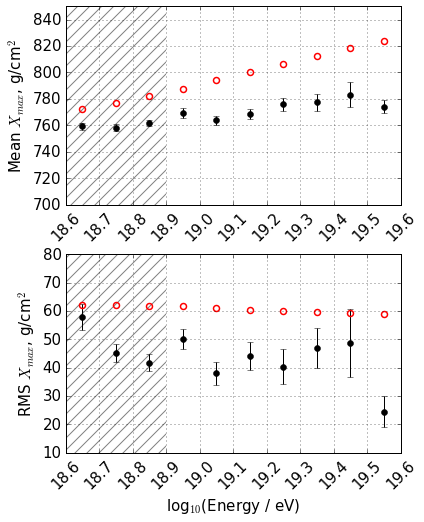

In [8]:
f_A_array = fluences[1:] / nuclear_fluence
#f_A_array = observed_log10_E
print f_A_array.shape

from Xmax import Xmax_modeler
xmm = Xmax_modeler(observed_log10_E)

model_Mean, model_RMS = xmm.getMeanRMS(f_A_array)
model_Mean = np.mean(model_Mean, axis=0)
model_RMS = np.mean(model_RMS, axis=0)

figure(figsize=(6,8))
ax1 = subplot(211)
errorbar(Auger_Data.X_max_log10_E_low_edge + Auger_Data.d_log10_E/2.,
        Auger_Data.X_max_Mean, 
        yerr= Auger_Data.X_max_Mean_err,
        fmt = 'ko')
plot(observed_log10_E + 0.05, model_Mean, 'o', mfc='none', mec='r', mew=1.5)
grid(True)
xticks(np.arange(18.6, 19.7, 0.1), rotation=45)
xlim(18.6, 19.6)
ylabel('Mean $X_{max}$, g/cm$^2$')
ylim(700., 850.)
y1,y2 = ax1.get_ylim()
fill_between([15., 18.9], [y1, y1], [y2,y2], facecolor='none', hatch='//', edgecolor='gray', linewidth=0.0)

ax2 = subplot(212)
errorbar(Auger_Data.X_max_log10_E_low_edge + Auger_Data.d_log10_E/2.,
        Auger_Data.X_max_RMS, 
        yerr= Auger_Data.X_max_RMS_err,
        fmt = 'ko')
plot(observed_log10_E + 0.05, model_RMS, 'o', mfc='none', mec='r', mew=1.5)
grid(True)
xticks(np.arange(18.6, 19.7, 0.1), rotation=45)
xlim(18.6, 19.6)
ylabel('RMS $X_{max}$, g/cm$^2$')
xlabel('log$_{10}$(Energy / eV)')
y1,y2 = ax2.get_ylim()
fill_between([15., 18.9], [y1, y1], [y2,y2], facecolor='none', hatch='//', edgecolor='gray', linewidth=0.0)

subplots_adjust(hspace=0.25)
